In [20]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

import ROOT as r
import rootnotes
import numpy as np
import matplotlib.pyplot as plt

canvas = rootnotes.default_canvas()

In [21]:
# Path to ROOT file that will be used to obtain the Trident invariant mass histogram
file_path = "/home/omoreno/work/hps/plots/engrun2015/pass3/1pt05_mc/tridents/rad/trident_analysis.root"

# Open the ROOT file and get the Trident invariant mass histogram
root_file = r.TFile(file_path)

## Fitting the full Trident invariant mass distribution

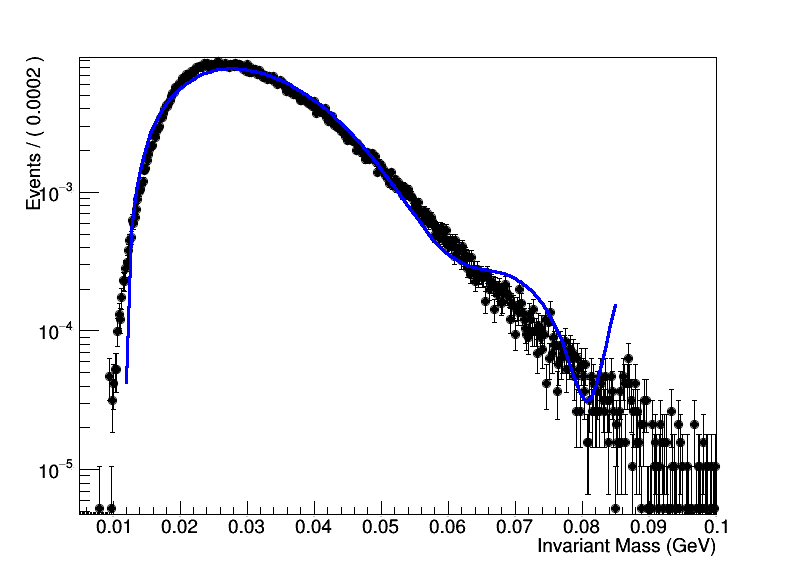

In [13]:
# Get the Trident invariant mass histogram from the file
histo = root_file.Get("invariant mass")

canvas.Clear()

# Start by normalizing the distribution to 1.  This is required so the RooFit 
# fit actually works
histo.Sumw2()
histo.Scale(1/histo.Integral())

# Create a data histogram that is compatible with RooFit
invariant_mass = r.RooRealVar("Invariant Mass", "Invariant Mass (GeV)", 0.005, 0.1)
arg_list = r.RooArgList(invariant_mass)
histogram_data = r.RooDataHist("invariant_mass_data", "invariant_mass_data", arg_list, histo)

# Variables used to define polynomials
a = []

a.append(r.RooRealVar("t1", "t1", 0, -10, 10))
a.append(r.RooRealVar("t2", "t2", 0, -10, 10))
a.append(r.RooRealVar("t3", "t3", 0, -10, 10))
a.append(r.RooRealVar("t4", "t4", 0, -10, 10))
a.append(r.RooRealVar("t5", "t5", 0, -10, 10))
a.append(r.RooRealVar("t6", "t6", 0, -10, 10))
a.append(r.RooRealVar("t7", "t7", 0, -10, 10))
#a.append(r.RooRealVar("t8", "t8", 0, -100, 100))
#a.append(r.RooRealVar("t9", "t9", 0, -100, 100))

arg_list = r.RooArgList()

for a_val in a : arg_list.add(a_val)

invariant_mass.setRange("full_range", 0.012, 0.085)
    
#model = r.RooPolynomial("model", "model", invariant_mass,  arg_list)
model = r.RooChebychev("model", "model", invariant_mass,  arg_list)

model.fitTo(histogram_data, r.RooFit.Range("full_range"))

# Get the frame that will be used in plotting
plot = invariant_mass.frame()

# Plot the histogram data
histogram_data.plotOn(plot)
model.plotOn(plot)

# Draw the frame 
plot.Draw()
plot.SetTitle("")
canvas.SetLogy()
canvas

# Composite Model


In [22]:
# Get the Trident invariant mass histogram from the file
histo = root_file.Get("invariant mass")

# Create a data histogram that is compatible with RooFit
invariant_mass = r.RooRealVar("Invariant Mass", "Invariant Mass (GeV)", 0.005, 0.1)
arg_list = r.RooArgList(invariant_mass)
histogram_data = r.RooDataHist("invariant_mass_data", "invariant_mass_data", arg_list, histo)

# The mean of the signal must be set and can't vary
ap_mass_mean = r.RooRealVar("ap_mass_mean", "ap_mass_mean", .003)
ap_mass_mean.setConstant(r.kTRUE)

# For now, assume a constant mass resolution across our range
ap_mass_sigma = r.RooRealVar("ap_mass_sigma", "ap_mass_sigma", 0.0025)
ap_mass_sigma.setConstant(r.kTRUE)

# Create a gaussian signal pdf with the mean at the mass hypothesis and sigma
# set to the mass resolution
signal = r.RooGaussian("signal", "signal", invariant_mass, ap_mass_mean, ap_mass_sigma)

# Variables used to define polynomials
a = []

a.append(r.RooRealVar("t1", "t1", 1, -10, 10))
a.append(r.RooRealVar("t2", "t2", 0, -2, 2))
a.append(r.RooRealVar("t3", "t3", 0, -2, 2))
a.append(r.RooRealVar("t4", "t4", 0, -2, 2))
a.append(r.RooRealVar("t5", "t5", 0, -2, 2))
a.append(r.RooRealVar("t6", "t6", 0, -2, 2))
a.append(r.RooRealVar("t7", "t7", 0, -2, 2))
#a.append(r.RooRealVar("t8", "t8", 0, -100, 100))
#a.append(r.RooRealVar("t9", "t9", 0, -100, 100))

nsig = r.RooRealVar("nsig","signal fraction", 0, 0,100000.)
nbkg = r.RooRealVar("nbkg","background fraction", 10000., 0.,10000000.) 

bkg_models = []
models = []

arg_list = r.RooArgList()
for var_index in range(0, len(a)) : 
    arg_list.add(a[var_index])
    print "Creating polynomial model of order " + str(var_index)
    bkg_models.append(r.RooChebychev("bkg_" + str(var_index), 
                                     "bkg_" + str(var_index), 
                                     invariant_mass, 
                                     arg_list)) 
    
    models.append(r.RooAddPdf("model_" + str(var_index), 
                              "model_" + str(var_index), 
                               r.RooArgList(signal, bkg_models[var_index]), 
                               r.RooArgList(nsig, nbkg)))
    

Creating polynomial model of order 0
Creating polynomial model of order 1
Creating polynomial model of order 2
Creating polynomial model of order 3
Creating polynomial model of order 4
Creating polynomial model of order 5
Creating polynomial model of order 6


# Fitting multiple polynomials within a window

## Background only Fit

chi2/dof: 4.73435913027
chi2/dof: 1.12658777996
chi2/dof: 1.1226377369
chi2/dof: 1.11871066287
chi2/dof: 1.11940591737
chi2/dof: 1.11436884338
chi2/dof: 1.11427646951


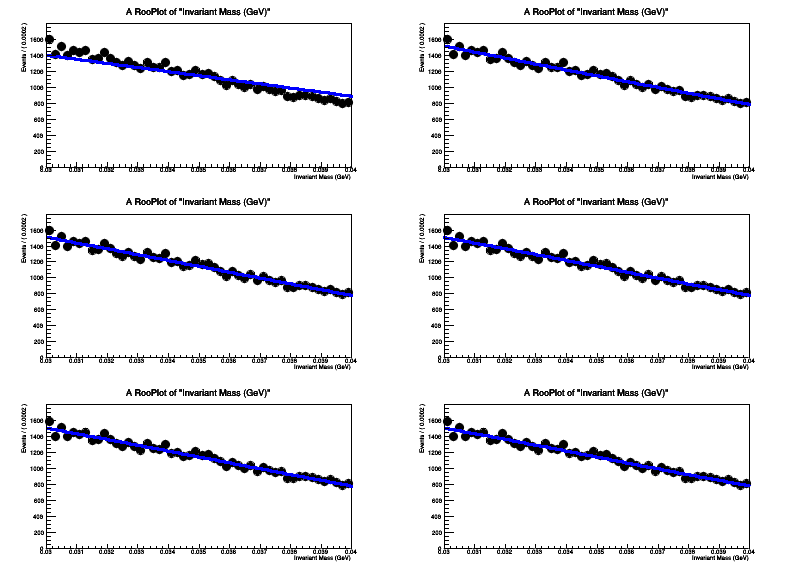

In [24]:
invariant_mass.setRange("test_range", 0.03, 0.04)

canvas.Clear()
canvas.Divide(2,3)

index = 1
    
for model in bkg_models : 
    
    # Plot the results
    plot = invariant_mass.frame(r.RooFit.Range("test_range"))
    
    # Fit the window to the background model
    result = model.fitTo(histogram_data, r.RooFit.Range("test_range"), r.RooFit.Save())
    
    histogram_data.plotOn(plot, r.RooFit.Range("test_range"))
    model.plotOn(plot, r.RooFit.NormRange("test_range"))
    
    canvas.cd(index)
    plot.Draw()
    
    # Calculate the chi^2
    print "chi2/dof: " + str(plot.chiSquare())
    
    index += 1

    # Reset all of the parameters
    initial_params = result.floatParsInit()
    
    for a_var in a : 
        
        #print "Resetting value of " + str(a_var.GetName())
        #print "Current value: " + str(a_var.getVal()) + " Current Error: " + str(a_var.getError())
        
        if initial_params.index(a_var.GetName()) == -1 : 
            #print "Variable is not in argument list."
            continue 
        a_var.setVal(initial_params[initial_params.index(a_var.GetName())].getVal())
        a_var.setError(initial_params[initial_params.index(a_var.GetName())].getError())
        
        #print "Reset value: " + str(a_var.getVal()) + " Reset Error: " + str(a_var.getError())
    
canvas

## Composite model fit 

chi2/dof: 1110.84564242
chi2/dof: 1110.84109327
chi2/dof: 1109.68922699
chi2/dof: 1110.72055146
chi2/dof: 1109.15529453
chi2/dof: 1110.84186268
chi2/dof: 1110.05889934


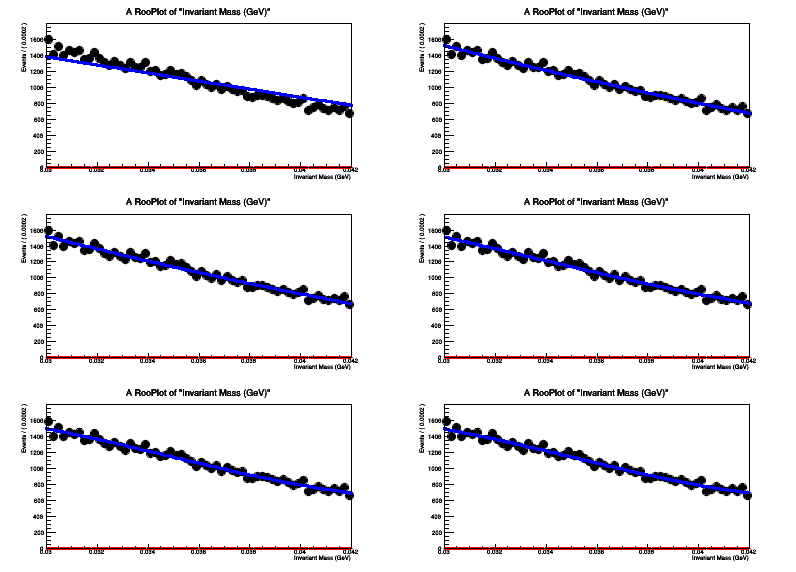

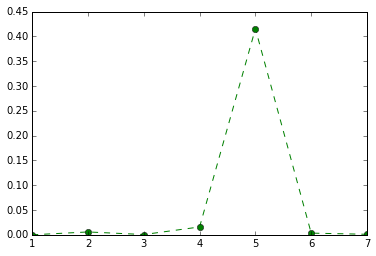

In [29]:
invariant_mass.setRange("test_range", 0.03, 0.042)
ap_mass_mean.setVal(0.036)

canvas.Clear()
canvas.Divide(2,3)

s = []
s_error = []
poly_values = []

index = 1

for model in models :
    
    # Plot the results
    plot = invariant_mass.frame(r.RooFit.Range("test_range"))
    
    # Fit the window to the background model
    result = model.fitTo(histogram_data, r.RooFit.Range("test_range"), r.RooFit.Save())
    
    histogram_data.plotOn(plot, r.RooFit.Range("test_range"))
    model.plotOn(plot, r.RooFit.NormRange("test_range"))
    model.plotOn(plot, r.RooFit.Components("signal"), r.RooFit.NormRange("test_range"), 
                 r.RooFit.LineStyle(r.RooFit.kDashed), r.RooFit.LineColor(r.RooFit.kRed))
    
    canvas.cd(index)
    plot.Draw()
    
    # Calculate the chi^2
    print "chi2/dof: " + str(plot.chiSquare())
    
    params = model.getVariables()
    s.append(params.find("nsig").getVal())
    s_error.append(params.find("nsig").getError())
    poly_values.append(index)
    
    index += 1
    
    # Reset all of the parameters
    initial_params = result.floatParsInit()
    
    for a_var in a : 
        
        #print "Resetting value of " + str(a_var.GetName())
        #print "Current value: " + str(a_var.getVal()) + " Current Error: " + str(a_var.getError())
        
        if initial_params.index(a_var.GetName()) == -1 : 
            #print "Variable is not in argument list."
            continue 
        a_var.setVal(initial_params[initial_params.index(a_var.GetName())].getVal())
        a_var.setError(initial_params[initial_params.index(a_var.GetName())].getError())
        
        #print "Reset value: " + str(a_var.getVal()) + " Reset Error: " + str(a_var.getError())

s_pull = np.divide(np.array(s), np.array(s_error))
plt.plot(poly_values, s_pull,'g--o')
    
canvas

# Fitting Using the Model

In [ ]:
canvas.Clear()

mass_window_size = 0.012
mass_window_step = 0.0005
mass_window_start = 0.03

plot = invariant_mass.frame()
histogram_data.plotOn(plot)

s = []
s_error = []
mass = []

while mass_window_start < 0.07 - mass_window_size : 
    #print "Fitting in window [ " + str(mass_window_start) + ", " + str(mass_window_start + mass_window_size) + " ]"
    ap_mass = mass_window_start + mass_window_size/2
    invariant_mass.setRange("A' mass = " + str(ap_mass), mass_window_start, mass_window_start + mass_window_size)
    #print "Setting A' mass hypothesis to " + str(ap_mass) + " GeV"
    ap_mass_mean.setVal(ap_mass)
    mass.append(ap_mass)
    result = models[6].fitTo(histogram_data, r.RooFit.Range("A' mass = " + str(ap_mass)), r.RooFit.Extended(), r.RooFit.Save())
    models[6].plotOn(plot, r.RooFit.Range("A' mass = " + str(ap_mass)), r.RooFit.NormRange("A' mass = " + str(ap_mass)))
    models[6].plotOn(plot, r.RooFit.Range("A' mass = " + str(ap_mass)), r.RooFit.Components("signal"), r.RooFit.LineStyle(r.RooFit.kDashed), 
                r.RooFit.NormRange("A' mass = " + str(ap_mass)), r.RooFit.LineColor(r.RooFit.kRed))
    params = models[6].getVariables()
    s.append(params.find("nsig").getVal())
    s_error.append(params.find("nsig").getError())
    mass_window_start += mass_window_step
    
    # Reset all of the parameters
    initial_params = result.floatParsInit()
    
    for a_var in a : 
        
        #print "Resetting value of " + str(a_var.GetName())
        #print "Current value: " + str(a_var.getVal()) + " Current Error: " + str(a_var.getError())
        
        if initial_params.index(a_var.GetName()) == -1 : 
            #print "Variable is not in argument list."
            continue 
        a_var.setVal(initial_params[initial_params.index(a_var.GetName())].getVal())
        a_var.setError(initial_params[initial_params.index(a_var.GetName())].getError())
        
        #print "Reset value: " + str(a_var.getVal()) + " Reset Error: " + str(a_var.getError())

plot.Draw()
canvas

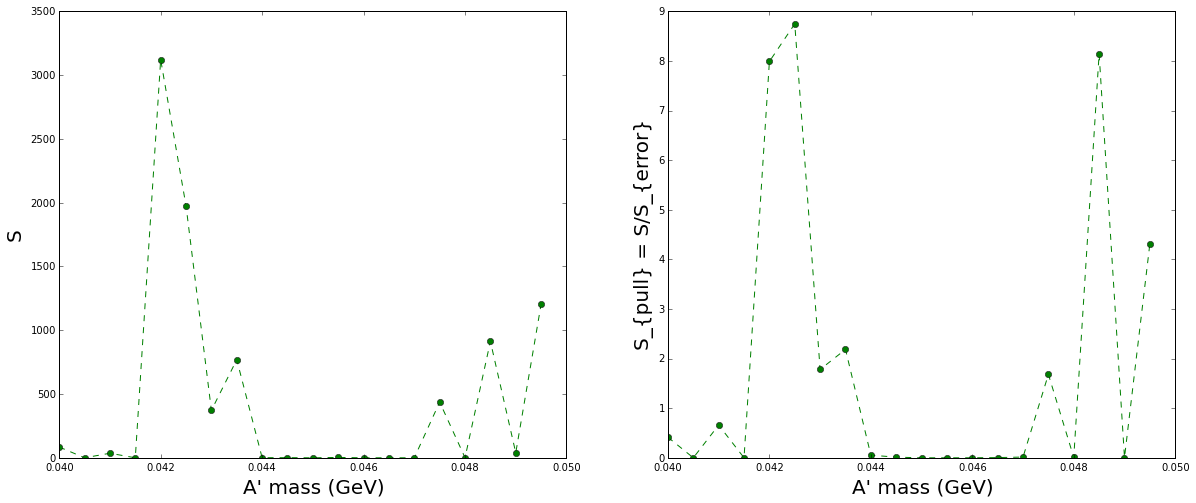

In [31]:
s_pull = np.divide(np.array(s), np.array(s_error))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 8))

ax0.plot(mass, s, 'g--o')
ax0.set_xlabel("A' mass (GeV)", fontsize=20)
ax0.set_ylabel("S", fontsize=20)
ax1.plot(mass, s_pull, 'g--o')
ax1.set_xlabel("A' mass (GeV)", fontsize=20)
ax1.set_ylabel("S_{pull} = S/S_{error}", fontsize=20)